<a href="https://colab.research.google.com/github/javier-jaime/Route-Recommender/blob/main/MST_EFM_POM_EDA_CSV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis (EDA)

---



### Express Freight Management Port Moresby

## Data Preparation

Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive
from google.colab import files

import matplotlib.pyplot as plt

In [ ]:
# Mount Google Drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Input the Date
date = input('Enter the date (Month_Day): ')

Enter the date (Month_Day): Nov_22


In [47]:
# Read dataset from excel in Google Drive to Pandas Data Frame
data = pd.read_csv('drive/MyDrive/Colab_Data/DMR/Daily_Movement_Report_'+ date +'.csv',encoding='cp1252', dtype={'StartLatLong': str, 'EndLatLong': str})
print(data.shape)
# data['ID'] = data['ID'].astype(int)
# data.set_index('ID', inplace=True)

(279, 34)


In [48]:
data.head(5).transpose()

,0,1,2,3,4
AssetExtra,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...
AssetHostID,BGP190,BGP190,BGP190,BGP190,BGP190
AssetID,524,524,524,524,524
SiteName,Express Freight POM / EFM POM GFI,Express Freight POM / EFM POM GFI,Express Freight POM / EFM POM GFI,Express Freight POM / EFM POM GFI,Express Freight POM / EFM POM GFI
DepartureDate,11/22/2022,11/22/2022,11/22/2022,11/22/2022,11/22/2022
AssetName2,TOM MARAGA,TOM MARAGA,ISAIAH LOHIA,ISAIAH LOHIA,ISAIAH LOHIA
FleetNumber,TRUCK 100,TRUCK 100,TRUCK 100,TRUCK 100,TRUCK 100
DepartureTime,5:56:26 AM,6:15:53 AM,8:05:33 AM,8:21:10 AM,8:47:47 AM
TimeZone1,ChST/PGT,ChST/PGT,ChST/PGT,ChST/PGT,ChST/PGT
DepartFrom,Baruni Area,Morata,Avenell Engineering Systems,"EFM Napa Napa Site, Porebada",Avenell Engineering Systems


In [49]:
# Empty/NA cells
data.isnull().any()

AssetExtra                   False
AssetHostID                  False
AssetID                      False
SiteName                     False
DepartureDate                False
AssetName2                   False
FleetNumber                  False
DepartureTime                False
TimeZone1                    False
DepartFrom                   False
StartLatLong                 False
TripType                     False
TripClassificationComment     True
DrivingTime                  False
StandingTime                 False
Duration                     False
Distance                     False
StartOdoMeter                False
EndOdoMeter                  False
MaxSpeed                     False
AvgSpeed                     False
ArrivalTime                  False
ArrivalDate                  False
TimeZone2                    False
ArriveAt                     False
EndLatLong                   False
NextDepartureDateTime         True
TimeZone                     False
TimeAtLocation      

In [50]:
# Drop no necessary columns
data.drop(columns=['TimeZone1','TripType','TripClassificationComment','TimeZone2','TimeZone','PassengerList','BlankJourneyType','TotalFuelUsedMeasured','CalcFuelConsumption','NextDepartureDateTime'], inplace=True)

In [51]:
# Data with Unknown values
data[data['ArriveAt'] == '[UNKNOWN]']

,AssetExtra,AssetHostID,AssetID,SiteName,DepartureDate,AssetName2,FleetNumber,DepartureTime,DepartFrom,StartLatLong,...,StartOdoMeter,EndOdoMeter,MaxSpeed,AvgSpeed,ArrivalTime,ArrivalDate,ArriveAt,EndLatLong,TimeAtLocation,NrOfVisits
249,EFM 85 POM – CAMC Twin Steer Flat Top (BGF 42...,BGF421,452,Express Freight POM / EFM POM GFI,11/22/2022,POTA BILLY,TRUCK 85,10:20:52 AM,[UNKNOWN],/,...,"45,735.20","45,735.50",24,14.03,10:22:09 AM,11/22/2022,[UNKNOWN],/,0:03:57,1
250,EFM 85 POM – CAMC Twin Steer Flat Top (BGF 42...,BGF421,452,Express Freight POM / EFM POM GFI,11/22/2022,POTA BILLY,TRUCK 85,10:26:06 AM,[UNKNOWN],/,...,"45,735.60","45,740.90",43,18.72,10:43:05 AM,11/22/2022,[UNKNOWN],/,0:23:31,1
251,EFM 85 POM – CAMC Twin Steer Flat Top (BGF 42...,BGF421,452,Express Freight POM / EFM POM GFI,11/22/2022,POTA BILLY,TRUCK 85,11:06:36 AM,[UNKNOWN],/,...,"45,740.90","45,741.70",36,18.46,11:09:12 AM,11/22/2022,[UNKNOWN],/,0:02:54,1
252,EFM 85 POM – CAMC Twin Steer Flat Top (BGF 42...,BGF421,452,Express Freight POM / EFM POM GFI,11/22/2022,POTA BILLY,TRUCK 85,11:12:06 AM,[UNKNOWN],/,...,"45,741.80","45,753.00",72,30.92,11:33:50 AM,11/22/2022,[UNKNOWN],/,0:08:06,1
253,EFM 85 POM – CAMC Twin Steer Flat Top (BGF 42...,BGF421,452,Express Freight POM / EFM POM GFI,11/22/2022,POTA BILLY,TRUCK 85,11:41:56 AM,[UNKNOWN],/,...,"45,753.00","45,760.60",66,30.13,11:57:04 AM,11/22/2022,[UNKNOWN],/,1:25:21,1
257,EFM 85 POM – CAMC Twin Steer Flat Top (BGF 42...,BGF421,452,Express Freight POM / EFM POM GFI,11/22/2022,POTA BILLY,TRUCK 85,3:19:55 PM,[UNKNOWN],/,...,"45,771.30","45,771.90",40,11.08,3:23:10 PM,11/22/2022,[UNKNOWN],/,0:16:19,1


In [52]:
# Replace Unknown values with Nulls
data[['DepartFrom','ArriveAt']] = data[['DepartFrom','ArriveAt']].replace('[UNKNOWN]',np.NaN)

In [53]:
# Drop rows with Empty/NA cells uncomment if required
data = data.dropna(axis=0)
print(data.shape)
data.isnull().any()

(273, 24)


AssetExtra        False
AssetHostID       False
AssetID           False
SiteName          False
DepartureDate     False
AssetName2        False
FleetNumber       False
DepartureTime     False
DepartFrom        False
StartLatLong      False
DrivingTime       False
StandingTime      False
Duration          False
Distance          False
StartOdoMeter     False
EndOdoMeter       False
MaxSpeed          False
AvgSpeed          False
ArrivalTime       False
ArrivalDate       False
ArriveAt          False
EndLatLong        False
TimeAtLocation    False
NrOfVisits        False
dtype: bool

In [54]:
data.dtypes

AssetExtra         object
AssetHostID        object
AssetID             int64
SiteName           object
DepartureDate      object
AssetName2         object
FleetNumber        object
DepartureTime      object
DepartFrom         object
StartLatLong       object
DrivingTime        object
StandingTime       object
Duration           object
Distance          float64
StartOdoMeter      object
EndOdoMeter        object
MaxSpeed            int64
AvgSpeed          float64
ArrivalTime        object
ArrivalDate        object
ArriveAt           object
EndLatLong         object
TimeAtLocation     object
NrOfVisits          int64
dtype: object

In [55]:
data.describe(include=[object]).transpose()

,count,unique,top,freq
AssetExtra,273,14,EFM 80 POM – CAMC Flat Top Tandem Axle Side Li...,36
AssetHostID,273,14,BGE795,36
SiteName,273,1,Express Freight POM / EFM POM GFI,273
DepartureDate,273,1,11/22/2022,273
AssetName2,273,15,TOM MARAGA,33
FleetNumber,273,14,TRUCK 80,36
DepartureTime,273,272,6:33:14 PM,2
DepartFrom,273,38,Avenell Engineering Systems,52
StartLatLong,273,228,-9.41753 / 147.1317,4
DrivingTime,273,199,0:00:00,9


In [56]:
data.describe().transpose().round(2)

,count,mean,std,min,25%,50%,75%,max
AssetID,273.0,379.58,172.31,26.0,446.0,448.00,452.00,525.00
Distance,273.0,4.47,7.74,0.0,0.0,0.60,5.80,70.40
MaxSpeed,273.0,30.83,25.01,5.0,7.0,21.00,54.00,94.00
AvgSpeed,273.0,13.74,12.98,0.0,0.0,10.38,23.86,49.14
NrOfVisits,273.0,1.00,0.00,1.0,1.0,1.00,1.00,1.00


In [57]:
# Drop NrOfVisits (all Ones)
data.drop(columns=['NrOfVisits'], inplace=True)

count    273.000000
mean       4.468132
std        7.736818
min        0.000000
25%        0.000000
50%        0.600000
75%        5.800000
max       70.400000
Name: Distance, dtype: float64

# of zeros: 80


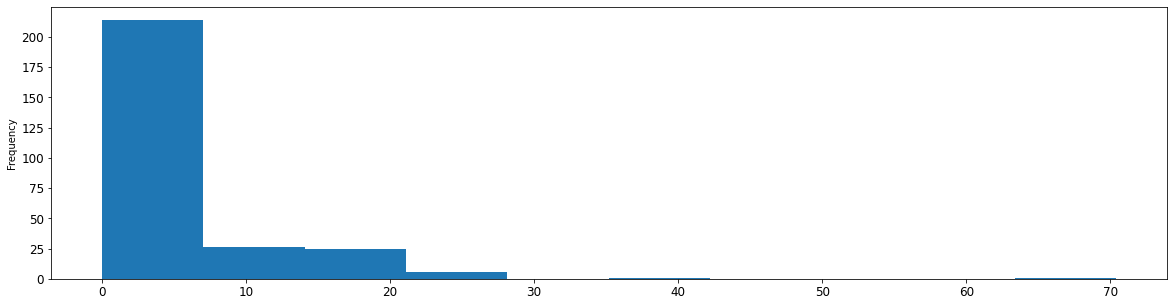

In [58]:
# Distance Distribution
print(data['Distance'].describe())
data['Distance'].plot.hist(figsize = [20, 5], fontsize = 12)
print('\n# of zeros:', len(data[data['Distance']==0]))

count    273.000000
mean       0.293529
std        0.331725
min        0.000000
25%        0.066667
50%        0.183333
75%        0.416667
max        1.816667
Name: Duration, dtype: float64

# of zeros: 15


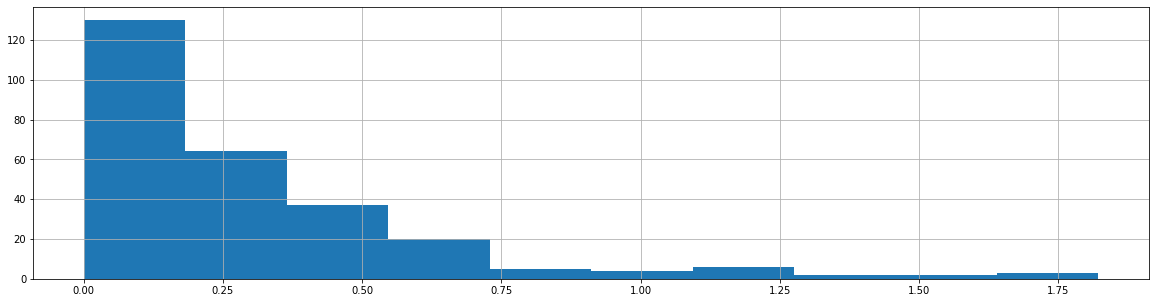

In [59]:
# Duration Distribution in hours
duration = data['Duration'].astype(str)
duration = duration.apply(pd.to_datetime)
print((duration.dt.hour + duration.dt.minute/60).describe())
(duration.dt.hour + duration.dt.minute/60 + duration.dt.second/3600).hist(figsize = [20, 5])
print('\n# of zeros:', sum((duration.dt.hour + duration.dt.minute/60)==0))

count    273.000000
mean      30.827839
std       25.010653
min        5.000000
25%        7.000000
50%       21.000000
75%       54.000000
max       94.000000
Name: MaxSpeed, dtype: float64


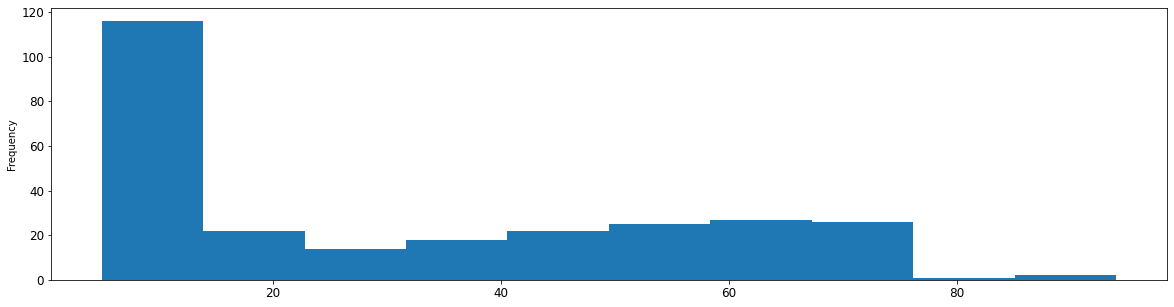

In [60]:
# Max Speed Distribution
print(data['MaxSpeed'].describe())
data['MaxSpeed'].plot.hist(figsize = [20, 5], fontsize = 12)

count    273.000000
mean      13.736154
std       12.978791
min        0.000000
25%        0.000000
50%       10.380000
75%       23.860000
max       49.140000
Name: AvgSpeed, dtype: float64

# of zeros: 81


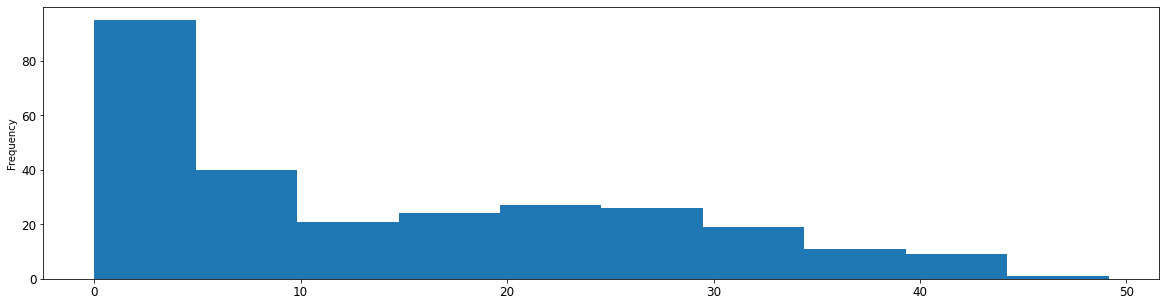

In [61]:
# Avg Speed Distribution
print(data['AvgSpeed'].describe())
data['AvgSpeed'].plot.hist(figsize = [20, 5], fontsize = 12)
print('\n# of zeros:', len(data[data['AvgSpeed']==0]))

In [62]:
# The OdoMeter Readings are not numeric
print(data['EndOdoMeter'].str.isnumeric().any())
print(data['StartOdoMeter'].str.isnumeric().any())

False
False


In [63]:
# Replace commas and convert to Float
data['EndOdoMeter'] = data['EndOdoMeter'].replace(',','',regex=True)
data['EndOdoMeter'] = data['EndOdoMeter'].astype(float)
data['StartOdoMeter'] = data['StartOdoMeter'].replace(',','',regex=True)
data['StartOdoMeter'] = data['StartOdoMeter'].astype(float)

count    273.000000
mean       4.468132
std        7.736818
min        0.000000
25%        0.000000
50%        0.600000
75%        5.800000
max       70.400000
dtype: float64

# of zeros: 80


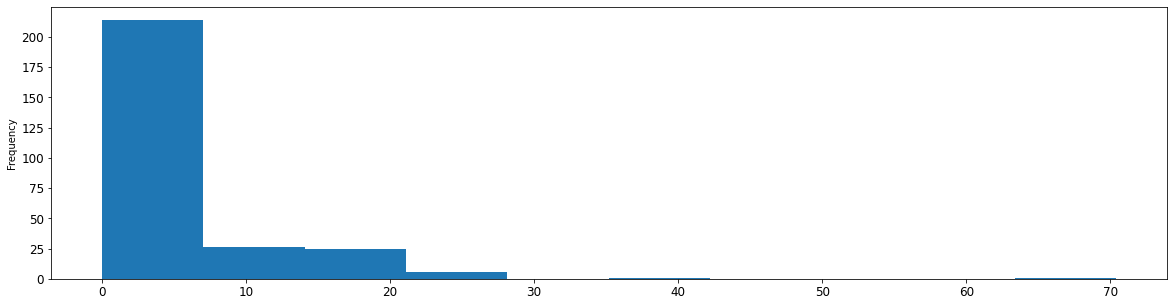

In [64]:
# OdoMeter Delta
print((data['EndOdoMeter'] - data['StartOdoMeter']).describe())
(data['EndOdoMeter'] - data['StartOdoMeter']).plot.hist(figsize = [20, 5], fontsize = 12)
print('\n# of zeros:', len(data[(data['EndOdoMeter'] - data['StartOdoMeter'])==0]))

count                          273
mean     0 days 00:09:59.721611721
std      0 days 00:14:36.587439940
min                0 days 00:00:00
25%                0 days 00:00:18
50%                0 days 00:03:02
75%                0 days 00:16:09
max                0 days 01:47:02
dtype: object

# of zeros: 9


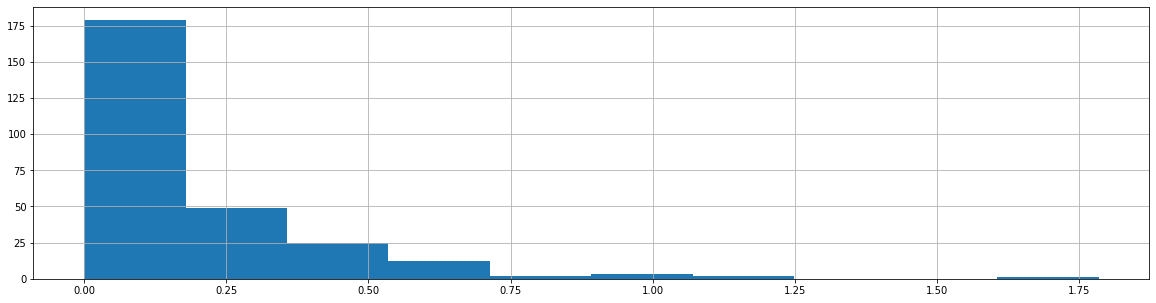

In [65]:
# Departure-Arrival Time Delta is not equal to Duration
departure = data['DepartureTime'].astype(str)
departure = departure.apply(pd.to_datetime)
arrival = data['ArrivalTime'].astype(str)
arrival = arrival.apply(pd.to_datetime)
print((arrival - departure).describe())
((arrival - departure).dt.total_seconds()/3600).hist(figsize = [20, 5])
print('\n# of zeros:', len(data[(arrival - departure).dt.total_seconds()==0]))


In [66]:
# Concatenate the Departure Date plus the Departure Time
data['DepartureDateTime'] = pd.to_datetime(data['DepartureDate'].astype(str) + ' ' +data['DepartureTime'].astype(str))

# Concatenate the Arrival Date plus the Arrival Time
data['ArrivalDateTime'] = pd.to_datetime(data['ArrivalDate'].astype(str) + ' ' +data['ArrivalTime'].astype(str))

# Recalculate Duration
data['Duration'] = data['ArrivalDateTime'] - data['DepartureDateTime']

In [67]:
# Split Site Data into Company and Site name
data[['Company','SiteName']] = data['SiteName'].str.split(' / ', 1, expand=True)

In [68]:
# Asset Extra (description) Counts Same as Asset ID
data['AssetExtra'].value_counts().to_frame()


,AssetExtra
EFM 80 POM – CAMC Flat Top Tandem Axle Side Lifter (BGE 795) GFI,36
EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,35
EFM 79 POM – CAMC Flat Top Tandem Axle Side Lifter (BGE 799) GFI,29
EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP 190),26
EFM 37 POM - CAMC Prime Mover (BET 411) GFI,22
EFM 81 POM – CAMC Prime Mover (BGE 780) GFI,22
EFM 85 POM – CAMC Twin Steer Flat Top (BGF 421) GFI,21
EFM 103 POM - HOWO TWIN STEER CAB CHASIS (BGN 557),20
EFM 101 POM - Hyundai Mighty 3 Ton Truck (BGP 191),19
EFM 33 POM - CAMC Flat Top Tandem Axle 18 Tonne (BGP 247) GFI,16


count            273
unique            15
top       TOM MARAGA
freq              33
Name: AssetName2, dtype: object


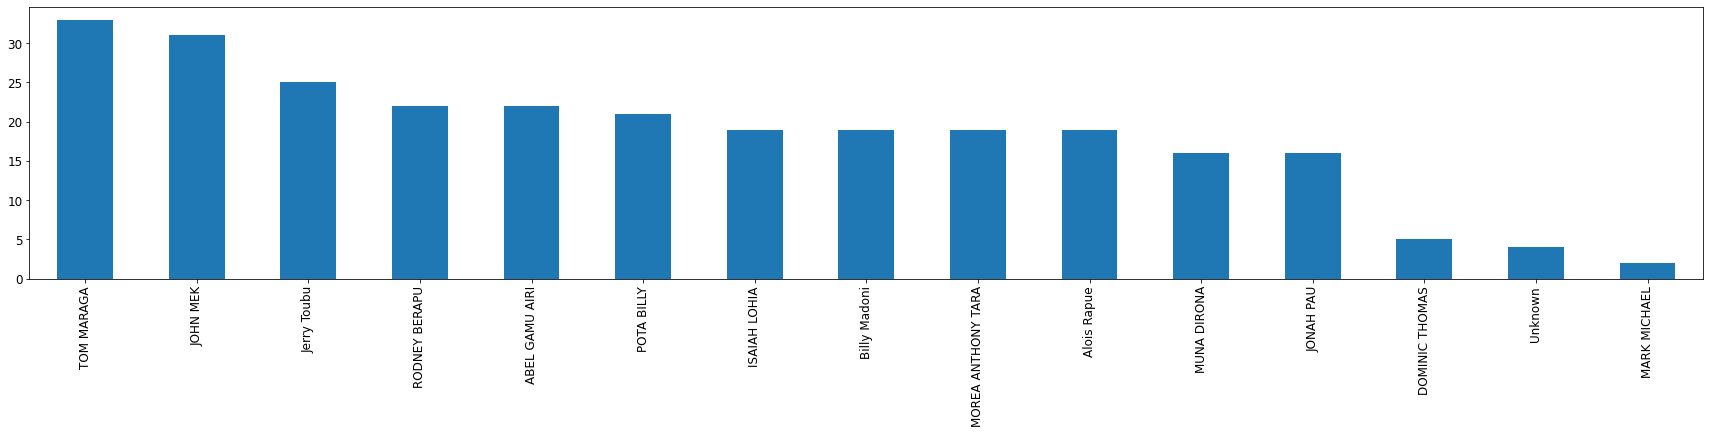

In [69]:
# Asset Counts
print(data['AssetName2'].describe())
data['AssetName2'].value_counts().plot.bar(figsize = [30, 5], fontsize = 12)

In [70]:
# Assets Usage
data[['AssetHostID','AssetID','AssetExtra','FleetNumber','Distance']].groupby(by=['AssetHostID','AssetID','AssetExtra','FleetNumber']).sum()

,,,,Distance
AssetHostID,AssetID,AssetExtra,FleetNumber,
BEL948,26,EFM 29 POM - CAMC Prime Mover (BEL 948) GFI,TRUCK 29,2.4
BET411,31,EFM 37 POM - CAMC Prime Mover (BET 411) GFI,TRUCK 37,101.5
BET413,33,EFM 39 POM - CAMC Prime Mover (BET 413) GFI,TRUCK 39,49.4
BGE780,451,EFM 81 POM – CAMC Prime Mover (BGE 780) GFI,TRUCK 81,115.2
BGE794,448,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,TRUCK 84,57.1
BGE795,447,EFM 80 POM – CAMC Flat Top Tandem Axle Side Lifter (BGE 795) GFI,TRUCK 80,184.0
BGE799,446,EFM 79 POM – CAMC Flat Top Tandem Axle Side Lifter (BGE 799) GFI,TRUCK 79,134.4
BGF421,452,EFM 85 POM – CAMC Twin Steer Flat Top (BGF 421) GFI,TRUCK 85,67.4
BGN557,519,EFM 103 POM - HOWO TWIN STEER CAB CHASIS (BGN 557),TRUCK 103,88.6


In [71]:
# Split Location Data into Latitude and Longitude and convert to float type (numeric)
data[['StartLat','StartLon']] = data['StartLatLong'].str.split(' / ', 1, expand=True)
data[['StartLat','StartLon']] = data[['StartLat','StartLon']].astype("float")
data[['EndLat','EndLon']] = data['EndLatLong'].str.split(' / ', 1, expand=True)
data[['EndLat','EndLon']] = data[['EndLat','EndLon']].astype("float")

# Drop Original Columns
data = data.drop(columns=['StartLatLong','EndLatLong'])

In [72]:
# Check for Double Locations
data.ArriveAt[data['ArriveAt'].str.contains(",")].unique()

array(['EFM Napa Napa Site, Porebada',
       'Baruni Area, East West/Agility Warehouse', 'Koki, PB Cheung',
       'Koki, P.B. Cheung Wholesale', 'GFI - Konedobu, Konedobu',
       '8 Mile Area, Eliseo Store & Storage Yard 8-mile',
       'Unnamed Road, Porebada, Papua New Guinea',
       'EFM Napa Napa Site, EFM POM ICD, Porebada',
       'EFM Napa Napa Site, EFM POM Workshop, Porebada',
       'EFM Napa Napa Site, EFM POM ICD, Outside EFM POM Office, Porebada',
       'Baruni Area, Napa Napa 1 Rd', 'Outside EFM POM Office, Porebada',
       'Gordons, Paradise Foods POM',
       'Napa Napa 2 Rd, Porebada, Total Service Station',
       'EFM Fuel Bowser Napanapa, EFM Napa Napa Fuel Bowser, EFM Napa Napa Site, Porebada',
       'Napa Napa 2 Rd, Porebada',
       'MIT - Consort Shipping, Motukea Dockyard, MIT - Motukea International Terminal',
       'EFM Napa Napa Site, Outside EFM POM Office, Porebada',
       'Kanudi Area, Napa Napa 1 Rd', 'Cholai, Choulai Wholsale',
       'Auto Poi

In [73]:
# Correct similat location names
data[['DepartFrom','ArriveAt']] = data[['DepartFrom','ArriveAt']].replace('Baruni Area, East West/Agility Warehouse','East West/Agility Warehouse')
data[['DepartFrom','ArriveAt']] = data[['DepartFrom','ArriveAt']].replace('GFI - Konedobu, Konedobu','GFI - Konedobu')
data[['DepartFrom','ArriveAt']] = data[['DepartFrom','ArriveAt']].replace('Gordons, Paradise Foods POM','Paradise Foods POM')
data[['DepartFrom','ArriveAt']] = data[['DepartFrom','ArriveAt']].replace('Gordons, RH Hyper Mart','RH Hyper Mart')

In [74]:
# Range of Location coordinates

# departure_range = data[['DepartFrom','StartLat','StartLon']].groupby(['DepartFrom']).agg(['min', 'max']).reset_index()
arrival_range = data[['ArriveAt','EndLat','EndLon']].groupby(['ArriveAt']).agg(['min', 'max']).reset_index()
arrival_range

ArriveAt   EndLat           \
                                                           min      max   
0     8 Mile Area, Eliseo Store & Storage Yard 8-mile -9.41911 -9.41872   
1                                         9 Mile Area -9.39100 -9.39100   
2                        Auto Point Workshop - Badili -9.47847 -9.47814   
3       Auto Point Workshop - Badili, GFI POM- Badili -9.47814 -9.47814   
4                         Avenell Engineering Systems -9.45117 -9.44067   
5                                              Badili -9.47881 -9.47881   
6                                         Baruni Area -9.42528 -9.42528   
7                         Baruni Area, Napa Napa 1 Rd -9.41767 -9.41767   
8                            Cholai, Choulai Wholsale -9.47669 -9.47669   
9   EFM Fuel Bowser Napanapa, EFM Napa Napa Fuel B... -9.41589 -9.41578   
10  EFM Fuel Bowser Napanapa, EFM Napa Napa Site, ... -9.41594 -9.41594   
11  EFM Napa Napa Site, EFM POM ICD, Outside EFM P... -9.41700 -9.41672   
12          EFM Napa Napa Site, EFM POM ICD, Porebada -9.41669 -9.41542   
13     EFM Napa Napa Site, EFM POM Workshop, Porebada -9.41533 -9.41517   
14  EFM Napa Napa Site, Outside EFM POM Office, Po... -9.41683 -9.41683   
15                       EFM Napa Napa Site, Porebada -9.41742 -9.41550   
16                        East West/Agility Warehouse -9.41781 -9.41717   
17                                     GFI - Konedobu -9.46675 -9.46561   
18                                    GFI POM- Badili -9.47811 -9.47750   
19                                  GFI Stagging Area -9.46550 -9.46542   
20                                            Gordons -9.45067 -9.44367   
21                        Kanudi Area, Napa Napa 1 Rd -9.44583 -9.44583   
22                        Koki, P.B. Cheung Wholesale -9.47872 -9.47872   
23                                    Koki, PB Cheung -9.47836 -9.47836   
24  MIT - Consort Shipping, Motukea Dockyard, MIT ... -9.42725 -9.42561   
25               MIT - Motukea International Terminal -9.42578 -9.42578   
26                                             Morata -9.40111 -9.40111   
27                                     Napa Napa 1 Rd -9.41614 -9.41614   
28                                     Napa Napa 2 Rd -9.42017 -9.42008   
29                           Napa Napa 2 Rd, Porebada -9.44553 -9.44542   
30    Napa Napa 2 Rd, Porebada, Total Service Station -9.41931 -9.41906   
31                   Outside EFM POM Office, Porebada -9.41744 -9.41744   
32                                 Paradise Foods POM -9.44550 -9.44525   
33                                           Porebada -9.42011 -9.41503   
34                             SVS Badilli Wharehouse -9.47825 -9.47825   
35           Unnamed Road, Porebada, Papua New Guinea -9.41978 -9.41978   
36                    WATERFRONT FOODWORLD LTD - KONE -9.46786 -9.46786   
37                                   Waigani Drive Rd -9.44772 -9.44772   
38                                             Xiebei -9.45678 -9.45678   

      EndLon            
         min       max  
0   147.2186  147.2190  
1   147.2300  147.2300  
2   147.1779  147.1781  
3   147.1781  147.1781  
4   147.0848  147.0934  
5   147.1773  147.1773  
6   147.1350  147.1350  
7   147.1272  147.1272  
8   147.1740  147.1740  
9   147.0767  147.0768  
10  147.0768  147.0768  
11  147.0751  147.0755  
12  147.0752  147.0764  
13  147.0764  147.0765  
14  147.0751  147.0751  
15  147.0757  147.0771  
16  147.1313  147.1329  
17  147.1582  147.1593  
18  147.1781  147.1789  
19  147.1574  147.1580  
20  147.1853  147.1909  
21  147.1436  147.1436  
22  147.1712  147.1712  
23  147.1707  147.1707  
24  147.1088  147.1103  
25  147.1107  147.1107  
26  147.1875  147.1875  
27  147.1147  147.1147  
28  147.0982  147.0983  
29  147.0793  147.0794  
30  147.0777  147.0785  
31  147.0756  147.0756  
32  147.1863  147.1874  
33  147.0460  147.0773  
34  147.1780  147.1780  
35  147.0416  147.0416  
36  147.1539  147.1

In [75]:
# Import the haversine distance function
!cp drive/MyDrive/Colab_Functions/haversine_distance.py "/content/"
import haversine_distance

In [76]:
# Maximum distance between Avenell Engineering Systems
print(round(haversine_distance.haversine_distance(-0.00594, -0.0051, 0, 0)), 'meters')

870 meters


In [77]:
# Error Range of Arrival Location Coordinates
arrival_range

ArriveAt   EndLat           \
                                                           min      max   
0     8 Mile Area, Eliseo Store & Storage Yard 8-mile -9.41911 -9.41872   
1                                         9 Mile Area -9.39100 -9.39100   
2                        Auto Point Workshop - Badili -9.47847 -9.47814   
3       Auto Point Workshop - Badili, GFI POM- Badili -9.47814 -9.47814   
4                         Avenell Engineering Systems -9.45117 -9.44067   
5                                              Badili -9.47881 -9.47881   
6                                         Baruni Area -9.42528 -9.42528   
7                         Baruni Area, Napa Napa 1 Rd -9.41767 -9.41767   
8                            Cholai, Choulai Wholsale -9.47669 -9.47669   
9   EFM Fuel Bowser Napanapa, EFM Napa Napa Fuel B... -9.41589 -9.41578   
10  EFM Fuel Bowser Napanapa, EFM Napa Napa Site, ... -9.41594 -9.41594   
11  EFM Napa Napa Site, EFM POM ICD, Outside EFM P... -9.41700 -9.41672   
12          EFM Napa Napa Site, EFM POM ICD, Porebada -9.41669 -9.41542   
13     EFM Napa Napa Site, EFM POM Workshop, Porebada -9.41533 -9.41517   
14  EFM Napa Napa Site, Outside EFM POM Office, Po... -9.41683 -9.41683   
15                       EFM Napa Napa Site, Porebada -9.41742 -9.41550   
16                        East West/Agility Warehouse -9.41781 -9.41717   
17                                     GFI - Konedobu -9.46675 -9.46561   
18                                    GFI POM- Badili -9.47811 -9.47750   
19                                  GFI Stagging Area -9.46550 -9.46542   
20                                            Gordons -9.45067 -9.44367   
21                        Kanudi Area, Napa Napa 1 Rd -9.44583 -9.44583   
22                        Koki, P.B. Cheung Wholesale -9.47872 -9.47872   
23                                    Koki, PB Cheung -9.47836 -9.47836   
24  MIT - Consort Shipping, Motukea Dockyard, MIT ... -9.42725 -9.42561   
25               MIT - Motukea International Terminal -9.42578 -9.42578   
26                                             Morata -9.40111 -9.40111   
27                                     Napa Napa 1 Rd -9.41614 -9.41614   
28                                     Napa Napa 2 Rd -9.42017 -9.42008   
29                           Napa Napa 2 Rd, Porebada -9.44553 -9.44542   
30    Napa Napa 2 Rd, Porebada, Total Service Station -9.41931 -9.41906   
31                   Outside EFM POM Office, Porebada -9.41744 -9.41744   
32                                 Paradise Foods POM -9.44550 -9.44525   
33                                           Porebada -9.42011 -9.41503   
34                             SVS Badilli Wharehouse -9.47825 -9.47825   
35           Unnamed Road, Porebada, Papua New Guinea -9.41978 -9.41978   
36                    WATERFRONT FOODWORLD LTD - KONE -9.46786 -9.46786   
37                                   Waigani Drive Rd -9.44772 -9.44772   
38                                             Xiebei -9.45678 -9.45678   

      EndLon            
         min       max  
0   147.2186  147.2190  
1   147.2300  147.2300  
2   147.1779  147.1781  
3   147.1781  147.1781  
4   147.0848  147.0934  
5   147.1773  147.1773  
6   147.1350  147.1350  
7   147.1272  147.1272  
8   147.1740  147.1740  
9   147.0767  147.0768  
10  147.0768  147.0768  
11  147.0751  147.0755  
12  147.0752  147.0764  
13  147.0764  147.0765  
14  147.0751  147.0751  
15  147.0757  147.0771  
16  147.1313  147.1329  
17  147.1582  147.1593  
18  147.1781  147.1789  
19  147.1574  147.1580  
20  147.1853  147.1909  
21  147.1436  147.1436  
22  147.1712  147.1712  
23  147.1707  147.1707  
24  147.1088  147.1103  
25  147.1107  147.1107  
26  147.1875  147.1875  
27  147.1147  147.1147  
28  147.0982  147.0983  
29  147.0793  147.0794  
30  147.0777  147.0785  
31  147.0756  147.0756  
32  147.1863  147.1874  
33  147.0460  147.0773  
34  147.1780  147.1780  
35  147.0416  147.0416  
36  147.1539  147.1

## Data Reduction

In [78]:
# Reduce the dataset as required 

site='EFM POM GFI'
day_data = data[data['SiteName']==site]

#day = 15  # Reduce to one day of the month only
#day_data = data[data['DepartureDateTime'].dt.day==day]

# Remove rows that have the same location name for Departure and Arrival 
day_data.drop(day_data[day_data['DepartFrom'] == day_data['ArriveAt']].index, inplace=True)

# Drop unnecessary columns 
day_data = day_data.drop(columns=['Company','AssetHostID','DepartureDate','FleetNumber','DrivingTime','StandingTime','ArrivalDate','ArrivalDate','TimeAtLocation','StartOdoMeter','EndOdoMeter','MaxSpeed','AvgSpeed'])

# Rename remaining columns
day_data = day_data.rename(columns={'AssetExtra':'Truck Description','AssetName2':'Driver Name','SiteName':'Site','DepartFrom':'Depart Location','ArriveAt':'Arrive Location'})

# Reorder and Re-index the columns
day_data = day_data.reindex(columns=['AssetID','Truck Description','Site','Driver Name','Depart Location','DepartureDateTime','Arrive Location','ArrivalDateTime','Duration','Distance','StartLat','StartLon','EndLat','EndLon'])

print('Reduced to', len(day_data), 'rows')
day_data.head()

Reduced to 147 rows


,AssetID,Truck Description,Site,Driver Name,Depart Location,DepartureDateTime,Arrive Location,ArrivalDateTime,Duration,Distance,StartLat,StartLon,EndLat,EndLon
0,524,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,EFM POM GFI,TOM MARAGA,Baruni Area,2022-11-22 05:56:26,Morata,2022-11-22 06:12:45,0 days 00:16:19,12.0,-9.42528,147.1350,-9.40111,147.1875
1,524,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,EFM POM GFI,TOM MARAGA,Morata,2022-11-22 06:15:53,Avenell Engineering Systems,2022-11-22 08:02:55,0 days 01:47:02,70.4,-9.40111,147.1875,-9.45017,147.0863
2,524,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,EFM POM GFI,ISAIAH LOHIA,Avenell Engineering Systems,2022-11-22 08:05:33,"EFM Napa Napa Site, Porebada",2022-11-22 08:18:50,0 days 00:13:17,4.8,-9.45017,147.0863,-9.41706,147.0757
3,524,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,EFM POM GFI,ISAIAH LOHIA,"EFM Napa Napa Site, Porebada",2022-11-22 08:21:10,Avenell Engineering Systems,2022-11-22 08:35:38,0 days 00:14:28,5.5,-9.41703,147.0757,-9.44589,147.0898
5,524,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,EFM POM GFI,ISAIAH LOHIA,Avenell Engineering Systems,2022-11-22 09:21:52,East West/Agility Warehouse,2022-11-22 09:51:15,0 days 00:29:23,12.1,-9.44592,147.0898,-9.41725,147.1315


## Geolocation Data

In [79]:
# Install necessary Libraries, uncomment if required
# !pip install geopandas
!pip install folium
import folium # map rendering library
from folium import plugins
# import geopandas as gpd
# from geopy.geocoders import Nominatim
# from shapely.geometry import LineString, Point
import matplotlib.cm as cm
import matplotlib.colors as colors

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [80]:
# Create a new Dataframe for Unique Origin Location
origins = day_data[['AssetID','StartLat','StartLon']].groupby(['AssetID','StartLat','StartLon']).mean().reset_index()
origins

,AssetID,StartLat,StartLon
0,26,-9.41692,147.0762
1,26,-9.41661,147.0756
2,26,-9.41578,147.0768
3,26,-9.41553,147.0763
4,26,-9.41517,147.0764
...,...,...,...
137,525,-9.41892,147.2186
138,525,-9.41753,147.1318
139,525,-9.41742,147.1313
140,525,-9.41533,147.0762


In [81]:
# Create a new Dataframe for Unique Destinations
destinations = day_data[['AssetID','EndLat','EndLon','ArrivalDateTime']].groupby(['AssetID','EndLat','EndLon','ArrivalDateTime']).count().reset_index()
destinations

,AssetID,EndLat,EndLon,ArrivalDateTime
0,26,-9.41708,147.0765,2022-11-22 13:47:16
1,26,-9.41661,147.0756,2022-11-22 13:14:50
2,26,-9.41608,147.0771,2022-11-22 15:34:14
3,26,-9.41578,147.0768,2022-11-22 13:24:16
4,26,-9.41550,147.0762,2022-11-22 14:05:58
...,...,...,...,...
142,525,-9.41897,147.2186,2022-11-22 15:32:15
143,525,-9.41756,147.1318,2022-11-22 16:38:12
144,525,-9.41747,147.1313,2022-11-22 14:47:42
145,525,-9.41544,147.0763,2022-11-22 09:39:58


In [82]:
# create a Port Moresby map using latitude and longitude values from destinations
map_pom = folium.Map(location=[-9.4,	147.2], zoom_start=12)

# add red markers to map for destinations
for lat, lon, id in zip(destinations['EndLat'], destinations['EndLon'], destinations['AssetID']):
    label = '{}'.format(id)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=1,
        popup=label,
        color='red',
        fill=True,
        fill_opacity = 1,
        parse_html=False).add_to(map_pom)

# add blue markers to map for origins
for lat, lon, id in zip(origins['StartLat'], origins['StartLon'], origins['AssetID']):
    label = '{}'.format(id)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color='blue',
        fill=True,
        fill_opacity = 0,
        parse_html=False).add_to(map_pom)    
 
map_pom

In [83]:
# create another Port Moresby map using latitude and longitude values from destinations
map_pom2 = folium.Map(location=[-9.4,	147.2], zoom_start=12)

# set color scheme for the asset IDs
ids = origins.AssetID.unique()
ys = [i + ids + (i*ids)**2 for i in range(len(ids))]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add rainbow of markers to the map for asset ids
markers_colors = []
for lat, lon, id, dest in zip(destinations['EndLat'], destinations['EndLon'], destinations['AssetID'], destinations['ArrivalDateTime']):
    label = '{}, {}'.format(id, dest)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=3,
        popup=label,
        color=rainbow[int(np.where(ids == id)[0])],
        fill=True,
        fill_color=rainbow[int(np.where(ids == id)[0])],
        fill_opacity = 1,
        parse_html=False).add_to(map_pom2)   

map_pom2

## Journey Management Plan

In [84]:
# Read dataset from excel in Google Drive to Pandas Data Frame
JMP_data = pd.read_excel('drive/MyDrive/Colab_Data/JMP/GFI_JMP_Workflow_'+ date +'.xlsx')
print(JMP_data.shape)
# data['ID'] = data['ID'].astype(int)
# data.set_index('ID', inplace=True)

(73, 12)


/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


In [85]:
JMP_data.head(5).transpose()

,0,1,2,3,4
Workflow,1.0,NaN,NaN,NaN,NaN
Truck Description,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI
Driver Name,Alois Rapue,Alois Rapue,Alois Rapue,Alois Rapue,Alois Rapue
Load #,1.0,1.0,2.0,2.0,3.0
Departure Time,08:30:00,10:30:00,12:00:00,14:00:00,15:30:00
Depart Location,GFI - Konedobu,Paradise Foods POM,GFI - Konedobu,Paradise Foods POM,GFI - Konedobu
Travel Time,01:00:00,00:30:00,01:00:00,00:30:00,01:00:00
Load Type,Bulk,NaN,Bulk,NaN,Bulk
Load,Bulk Flour,NaN,Bulk Flour,NaN,Bulk Flour
Arrival Time,09:30:00,11:00:00,13:00:00,14:30:00,16:30:00


In [86]:
# Empty/NA cells
JMP_data.isnull().any()

Workflow              True
Truck Description     True
Driver Name           True
Load #                True
Departure Time        True
Depart Location       True
Travel Time           True
Load Type             True
Load                  True
Arrival Time          True
Arrive Location       True
Load/Off-load Time    True
dtype: bool

In [87]:
# Drop Workflow, Load Type & Load not in every row, drop Load/Off-load Time is not a Lag
JMP_data.drop(columns=['Workflow','Load Type','Load','Load/Off-load Time'], inplace=True)

In [88]:
# Remaining Columns
JMP_data.columns

Index(['Truck Description', 'Driver Name', 'Load #', 'Departure Time',
       'Depart Location', 'Travel Time', 'Arrival Time', 'Arrive Location'],
      dtype='object')

In [89]:
# Drop rows with Empty/NA cells
JMP_data = JMP_data.dropna(axis=0)
print(JMP_data.shape)
JMP_data.isnull().any()

(64, 8)


Truck Description    False
Driver Name          False
Load #               False
Departure Time       False
Depart Location      False
Travel Time          False
Arrival Time         False
Arrive Location      False
dtype: bool

In [90]:
# Check Data Types
JMP_data.dtypes

Truck Description     object
Driver Name           object
Load #               float64
Departure Time        object
Depart Location       object
Travel Time           object
Arrival Time          object
Arrive Location       object
dtype: object

In [91]:
# Check Report Date and add to JMP
Date = data['ArrivalDate'][0]
print('Report Date:',Date)

# Concatenate the Departure Date plus the Departure Time
JMP_data['Departure Time'] = pd.to_datetime(Date + ' ' +JMP_data['Departure Time'].astype(str))

# Concatenate the Arrival Date plus the Arrival Time
JMP_data['Arrival Time'] = pd.to_datetime(Date + ' ' +JMP_data['Arrival Time'].astype(str))

JMP_data['Travel Time'] = JMP_data['Arrival Time'] - JMP_data['Departure Time']

Report Date: 11/22/2022


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [92]:
# Convert Load # to Integer
JMP_data['Load #'] = JMP_data['Load #'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [93]:
JMP_data.describe(include=[object]).transpose()

,count,unique,top,freq
Truck Description,64,10,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,7
Driver Name,64,10,Alois Rapue,7
Depart Location,64,10,Avenell Engineering Systems,22
Arrive Location,64,10,Avenell Engineering Systems,21


In [94]:
# Filter dataset to a list of trucks in the JMP
truck_list = JMP_data['Truck Description'].unique().tolist()
day_data = day_data[day_data['Truck Description'].isin(truck_list)]
len(day_data)

127

In [95]:
# Filter dataset to a list of JMP arrival locations
locations = JMP_data['Arrive Location'].unique().tolist()
Actuals = day_data[day_data['Arrive Location'].isin(locations)]
len(Actuals)

62

In [96]:
# Rename Actuals Columns
Actuals = Actuals.rename(columns={'ArrivalDateTime':'Actual AT','DepartureDateTime':'Actual DT','Depart Location':'Actual Depart Location','Duration':'Actual TT'})

In [97]:
# Actual Arrivals by Truck, Driver & Location
Actuals = Actuals[['Truck Description','Driver Name','Arrive Location','Actual AT','Actual Depart Location','Actual DT','Actual TT']]\
  .groupby(by=['Truck Description','Driver Name','Arrive Location','Actual AT','Actual Depart Location','Actual DT','Actual TT']).count().reset_index()
Actuals.head()

,Truck Description,Driver Name,Arrive Location,Actual AT,Actual Depart Location,Actual DT,Actual TT
0,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,Billy Madoni,Avenell Engineering Systems,2022-11-22 19:25:31,"Unnamed Road, Porebada, Papua New Guinea",2022-11-22 19:01:07,0 days 00:24:24
1,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,ISAIAH LOHIA,Avenell Engineering Systems,2022-11-22 08:35:38,"EFM Napa Napa Site, Porebada",2022-11-22 08:21:10,0 days 00:14:28
2,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,ISAIAH LOHIA,Avenell Engineering Systems,2022-11-22 17:06:53,"8 Mile Area, Eliseo Store & Storage Yard 8-mile",2022-11-22 16:23:31,0 days 00:43:22
3,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,ISAIAH LOHIA,East West/Agility Warehouse,2022-11-22 09:51:15,Avenell Engineering Systems,2022-11-22 09:21:52,0 days 00:29:23
4,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,ISAIAH LOHIA,East West/Agility Warehouse,2022-11-22 15:08:41,GFI - Konedobu,2022-11-22 14:54:28,0 days 00:14:13


In [98]:
# Add load number
Actuals['Load #'] = Actuals[['Truck Description','Driver Name','Arrive Location']].groupby(by=['Truck Description','Driver Name','Arrive Location']).cumcount()+1
Actuals.head()

,Truck Description,Driver Name,Arrive Location,Actual AT,Actual Depart Location,Actual DT,Actual TT,Load #
0,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,Billy Madoni,Avenell Engineering Systems,2022-11-22 19:25:31,"Unnamed Road, Porebada, Papua New Guinea",2022-11-22 19:01:07,0 days 00:24:24,1
1,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,ISAIAH LOHIA,Avenell Engineering Systems,2022-11-22 08:35:38,"EFM Napa Napa Site, Porebada",2022-11-22 08:21:10,0 days 00:14:28,1
2,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,ISAIAH LOHIA,Avenell Engineering Systems,2022-11-22 17:06:53,"8 Mile Area, Eliseo Store & Storage Yard 8-mile",2022-11-22 16:23:31,0 days 00:43:22,2
3,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,ISAIAH LOHIA,East West/Agility Warehouse,2022-11-22 09:51:15,Avenell Engineering Systems,2022-11-22 09:21:52,0 days 00:29:23,1
4,EFM 100 POM - Hyundai Mighty 3 Ton Truck (BGP ...,ISAIAH LOHIA,East West/Agility Warehouse,2022-11-22 15:08:41,GFI - Konedobu,2022-11-22 14:54:28,0 days 00:14:13,2


In [99]:
JMP_data_actual = pd.merge(JMP_data, Actuals,  how='left', left_on=['Truck Description','Driver Name','Arrive Location','Load #'], right_on = ['Truck Description','Driver Name','Arrive Location','Load #'])
JMP_data_actual.head()

,Truck Description,Driver Name,Load #,Departure Time,Depart Location,Travel Time,Arrival Time,Arrive Location,Actual AT,Actual Depart Location,Actual DT,Actual TT
0,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,Alois Rapue,1,2022-11-22 08:30:00,GFI - Konedobu,0 days 01:00:00,2022-11-22 09:30:00,Paradise Foods POM,2022-11-22 10:41:37,GFI Stagging Area,2022-11-22 10:27:49,0 days 00:13:48
1,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,Alois Rapue,1,2022-11-22 10:30:00,Paradise Foods POM,0 days 00:30:00,2022-11-22 11:00:00,GFI - Konedobu,2022-11-22 12:18:12,Gordons,2022-11-22 12:06:39,0 days 00:11:33
2,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,Alois Rapue,2,2022-11-22 12:00:00,GFI - Konedobu,0 days 01:00:00,2022-11-22 13:00:00,Paradise Foods POM,2022-11-22 15:23:58,GFI Stagging Area,2022-11-22 15:12:11,0 days 00:11:47
3,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,Alois Rapue,2,2022-11-22 14:00:00,Paradise Foods POM,0 days 00:30:00,2022-11-22 14:30:00,GFI - Konedobu,2022-11-22 17:00:12,Paradise Foods POM,2022-11-22 16:43:36,0 days 00:16:36
4,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,Alois Rapue,3,2022-11-22 15:30:00,GFI - Konedobu,0 days 01:00:00,2022-11-22 16:30:00,Paradise Foods POM,2022-11-22 23:56:57,GFI Staging Area 2,2022-11-22 23:47:57,0 days 00:09:00


In [100]:
# Calculate Time Differences and add them to Dataframe 
JMP_data_actual['DT Hours Difference'] = (JMP_data_actual['Departure Time'] - JMP_data_actual['Actual DT']).dt.total_seconds()/3600
JMP_data_actual['AT Hours Difference'] = (JMP_data_actual['Arrival Time'] - JMP_data_actual['Actual AT']).dt.total_seconds()/3600
JMP_data_actual['TT Hours Difference'] = (JMP_data_actual['Travel Time'] - JMP_data_actual['Actual TT']).dt.total_seconds()/3600


In [101]:
JMP_data_actual.head().transpose()

,0,1,2,3,4
Truck Description,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI,EFM 84 POM – CAMC Prime Mover (BGE 794) GFI
Driver Name,Alois Rapue,Alois Rapue,Alois Rapue,Alois Rapue,Alois Rapue
Load #,1,1,2,2,3
Departure Time,2022-11-22 08:30:00,2022-11-22 10:30:00,2022-11-22 12:00:00,2022-11-22 14:00:00,2022-11-22 15:30:00
Depart Location,GFI - Konedobu,Paradise Foods POM,GFI - Konedobu,Paradise Foods POM,GFI - Konedobu
Travel Time,0 days 01:00:00,0 days 00:30:00,0 days 01:00:00,0 days 00:30:00,0 days 01:00:00
Arrival Time,2022-11-22 09:30:00,2022-11-22 11:00:00,2022-11-22 13:00:00,2022-11-22 14:30:00,2022-11-22 16:30:00
Arrive Location,Paradise Foods POM,GFI - Konedobu,Paradise Foods POM,GFI - Konedobu,Paradise Foods POM
Actual AT,2022-11-22 10:41:37,2022-11-22 12:18:12,2022-11-22 15:23:58,2022-11-22 17:00:12,2022-11-22 23:56:57
Actual Depart Location,GFI Stagging Area,Gordons,GFI Stagging Area,Paradise Foods POM,GFI Staging Area 2


In [102]:
# Reorder and Re-index the columns
JMP_data_actual = JMP_data_actual.reindex(columns=['Truck Description','Driver Name','Load #','Depart Location','Actual Depart Location','Departure Time','Actual DT','DT Hours Difference','Arrive Location','Arrival Time','Actual AT','AT Hours Difference','Travel Time','Actual TT','TT Hours Difference'])


In [103]:
# Save the original dataset to a CSV file and copy to Google Drive
JMP_data_actual.to_csv('GFI_JMP_data_comparison_'+ date +'.csv')
!cp *.csv "/content/drive/My Drive/Colab_Data/JMP"

## Add Formating & Export to Excel

In [104]:
# Convert Departure & Arrival DateTimes to 24 hours format 
JMP_data_actual['Arrival Time'] = pd.to_datetime(JMP_data_actual['Arrival Time']).dt.strftime('%H:%M:%S')
JMP_data_actual['Departure Time'] = pd.to_datetime(JMP_data_actual['Departure Time']).dt.strftime('%H:%M:%S')
JMP_data_actual['Actual AT'] = pd.to_datetime(JMP_data_actual['Actual AT']).dt.strftime('%H:%M:%S')
JMP_data_actual['Actual DT'] = pd.to_datetime(JMP_data_actual['Actual DT']).dt.strftime('%H:%M:%S')

In [105]:
# Convert Duration Time to 24 hours format
JMP_data_actual['Actual TT'] = (JMP_data_actual['Actual TT'] + pd.Timestamp(Date)).dt.strftime('%H:%M:%S')
JMP_data_actual['Travel Time'] = (JMP_data_actual['Travel Time'] + pd.Timestamp(Date)).dt.strftime('%H:%M:%S')

In [106]:
!pip install xlsxwriter # Uncomment if required
import xlsxwriter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 149 kB 5.1 MB/s 


In [107]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('GFI_JMP_data_comparison_'+ date +'.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
JMP_data_actual.to_excel(writer, sheet_name='JMP')

# Get the xlsxwriter workbook and worksheet objects.
workbook  = writer.book
worksheet = writer.sheets['JMP']

# Get the dimensions of the dataframe.
(max_row, max_col) = JMP_data_actual.shape

# Add a format. Light red fill with dark red text.
format1 = workbook.add_format({'bg_color': '#FFC7CE',
                               'font_color': '#9C0006',
                               'num_format': '##0.00'})

# Add a format. Green fill with dark green text.
format2 = workbook.add_format({'bg_color': '#C6EFCE',
                               'font_color': '#006100'})

# Add a format. Green fill with dark green text plus date format.
format3 = workbook.add_format({'bg_color': '#C6EFCE',
                               'font_color': '#006100',
                               'align': 'center',
                               'num_format': 'h:mm AM/PM'})

# Add a format. Green fill with dark green text plus time format.
format4 = workbook.add_format({'bg_color': '#C6EFCE',
                               'font_color': '#006100',
                               'align': 'center',
                               'num_format': '##0.00'})

# Set the column width and format.
worksheet.set_column(1, 1, 60, format2)
worksheet.set_column(2, 2, 20, format2)
worksheet.set_column(3, 3, 10, format2)
worksheet.set_column(4, 4, 30, format2)
worksheet.set_column(5, 5, 60, format2)
worksheet.set_column(6, 7, 15, format3)
worksheet.set_column(8, 8, 20, format4)
worksheet.set_column(9, 9, 30, format2)
worksheet.set_column(10, 11, 15, format3)
worksheet.set_column(12, 12, 20, format4)
worksheet.set_column(13, 14, 15, format4)
worksheet.set_column(15, 15, 20, format4)

# Write a conditional format over a range.
worksheet.conditional_format(1,1,max_row, max_col, {'type': 'cell',
                                         'criteria': '<=',
                                         'value': 0,
                                         'format': format1})

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [108]:
# Copy the Excel file to the Google Drive Folder
!cp *.xlsx "/content/drive/My Drive/Colab_Data/JMP"